In [ ]:
import  numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("sales.csv")

In [ ]:
data.describe()


,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [ ]:
data["Buys"].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
x = data.iloc[:, :-1]

In [ ]:
x = x.apply(le.fit_transform)

In [ ]:
print("Age with encoded value: ", list(zip(data.iloc[:, 0], x.iloc[:, 0])))

Age with encoded value:  [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]


In [ ]:
print("Income with encoded value: ", list(zip(data.iloc[: , 1], x.iloc[:, 1])))

Income with encoded value:  [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]


In [ ]:
print("Gender with encoded value: ", list(zip(data.iloc[:, 2], x.iloc[:, 2])))

Gender with encoded value:  [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]


In [ ]:
print("Maritial status with encoded value: ", list(zip(data.iloc[:, 3], x.iloc[:, 3])))

Maritial status with encoded value:  [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [ ]:
y=data.iloc[:, -1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [ ]:
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted Decision for input [Age < 21, Income = Low, Gender = Female, Maritial Status = Married]\n", test_x, "is ", pred_y[0])

Predicted Decision for input [Age < 21, Income = Low, Gender = Female, Maritial Status = Married]
 [1 1 0 0] is  Yes


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier, out_file="data.dot", feature_names=x.columns, class_names=["No", "Yes"])

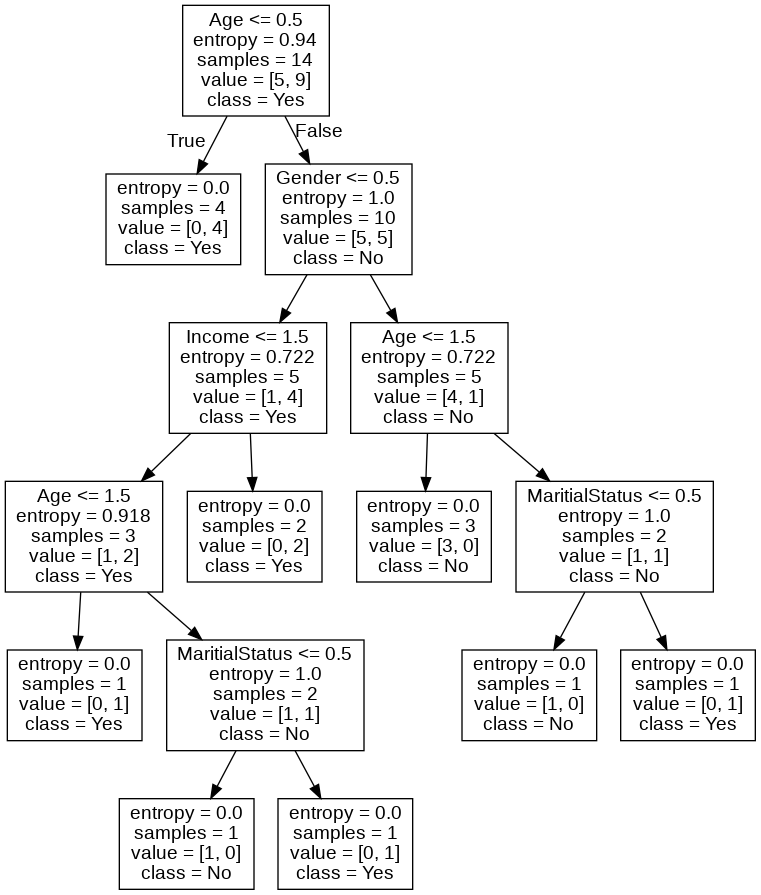

In [ ]:
!dot -Tpng data.dot -o tree.png
Image("tree.png")